# Herramientas Computacionales
### 2016 - 2
## Tarea 11 - Solución

In [14]:
%pylab inline
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


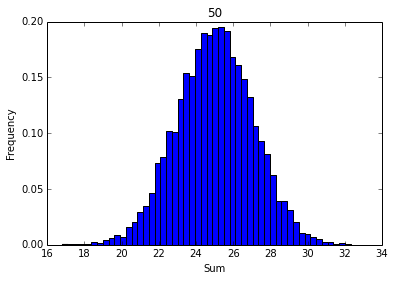

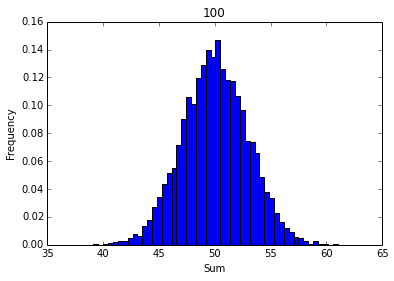

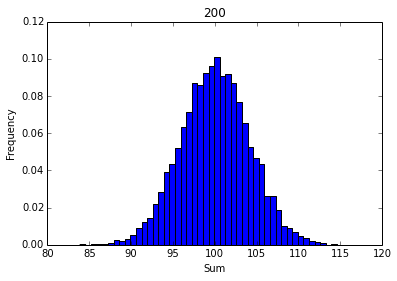

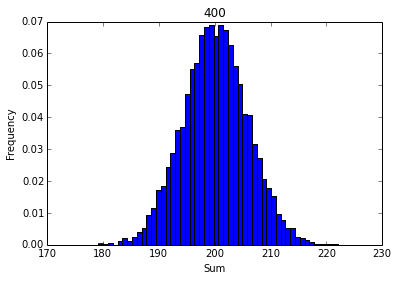

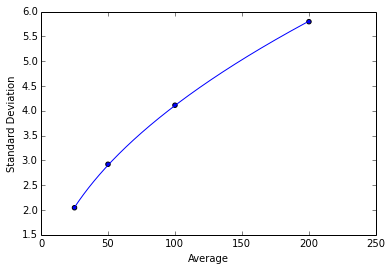

In [15]:
def sum_random_numbers(n):
    '''
    Returns the sum of n random numbers (uniform [0,1))
    '''
    suma = 0
    for i in range(n):
        suma += np.random.random()
    return suma

def many_sums_of_random_numbers(n, m):
    '''
    Returns an array with the results of m sums of n random numbers (uniform [0,1)) and plots the histogram
    '''
    sums = []
    for i in range(m):
        suma = sum_random_numbers(n)
        sums.append(suma)
    hist_data = plt.hist(sums , normed = True, bins = 50)
    plt.xlabel("Sum")
    plt.ylabel("Frequency")
    plt.title(str(n))
    plt.show()
    plt.close()
    
    return sums


def fitting_function(x, a):
    return a*np.sqrt(x)

def many_sums_varying_n(N, m):
    '''
    Plots the scatter together with the fit to the function fitting_function
    '''

    Averages = []
    Stds = []
    for n in N:
        sums = many_sums_of_random_numbers(n, m)
        Averages.append(np.mean(sums))
        Stds.append(np.std(sums))
    
    pars, covm = curve_fit(fitting_function, Averages, Stds)
    x = np.linspace(min(Averages), max(Averages), 1000)
    plt.plot(x, fitting_function(x, pars[0]))
    
    plt.scatter(Averages, Stds)
    plt.xlabel("Average")
    plt.ylabel("Standard Deviation")
    plt.show()
    plt.close()
    
    return Averages, Stds

N = [50, 100, 200, 400]
Averages, Stds = many_sums_varying_n(N, 10000)